In [1]:
#Unzip data
# !unzip Q3_dataset.zip 

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from collections import Counter

In [3]:
# Switch to dataset folder
os.chdir("/content/drive/MyDrive/ECE2/ECE6780/Programming/Image_data")

## a)

In [4]:
img_list = sorted(os.listdir()) # Get sorted list of files
classes = ["Necrosis", "Stroma", "Tumor"]
Y = []

for img in img_list:
    for idx in range(len(classes)):
        if classes[idx] in img:
            Y.append(idx)

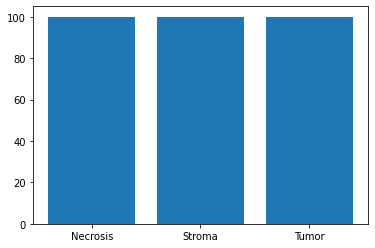

In [5]:
# Histogram for classes
plt.bar(classes, dict(Counter(Y)).values())
plt.show()

No dataset imbalance: All classes have equal number of images.

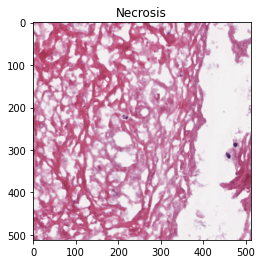

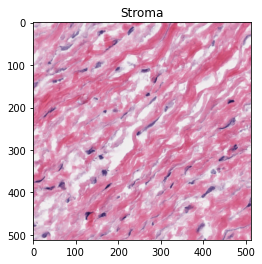

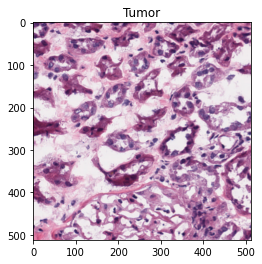

In [6]:
# Plot an image from each class
for idx,im in enumerate(["Necrosis_1.png", "Stroma_1.png", "Tumor_1.png"]):
    im = plt.imread(im) # or plt.imread(im)
    plt.imshow(im)
    plt.title(classes[idx])
    plt.show()

## b) Rotation

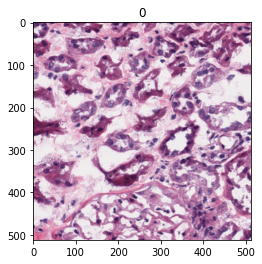

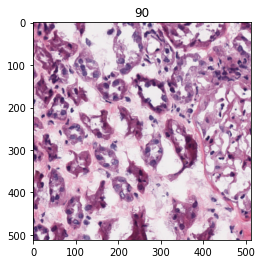

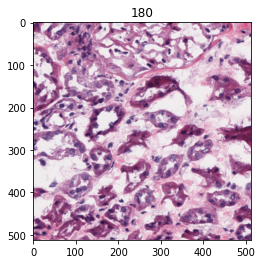

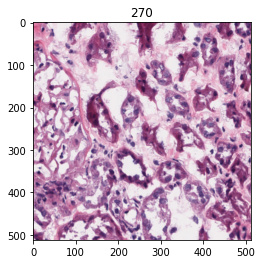

In [7]:
for i in range(4):
    im_rot = np.rot90(im, i) # Rotate
    plt.imshow(im_rot)
    plt.title(str(i*90))
    plt.show()

## c) Translation

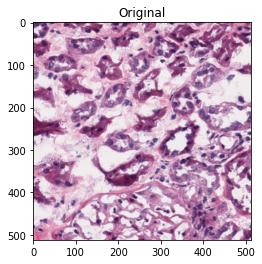

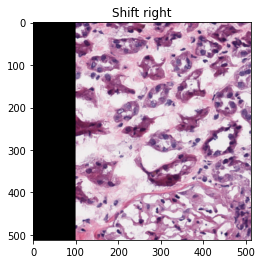

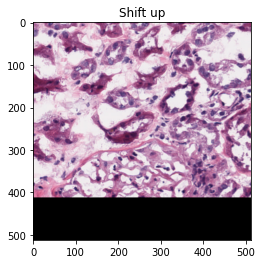

In [8]:
from scipy.ndimage import shift

# Shift 
plt.imshow(im)
plt.title("Original")
plt.show()

im_right = shift(im,(0,100,0))
plt.imshow(im_right)
plt.title("Shift right")
plt.show()

im_up = shift(im,(-100,0,0))
plt.imshow(im_up)
plt.title("Shift up")
plt.show()

## d) Noise

In [9]:
from scipy.ndimage import gaussian_filter

In [10]:
noise = np.random.rand(512,512,3)*50 # random values from 0 to 50
img_noisy = im*255 + noise

img_noisy = (img_noisy-np.min(img_noisy))/(np.max(img_noisy)-np.min(img_noisy)) * 255 # Rescale
img_noisy = np.uint8(img_noisy)

In [11]:
np.max(np.uint8(img_noisy)) # Verify scaling

255

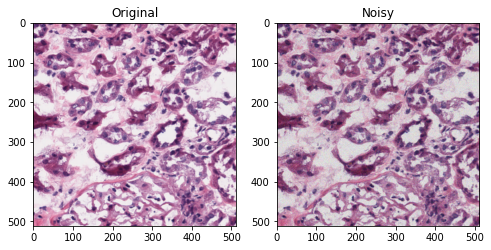

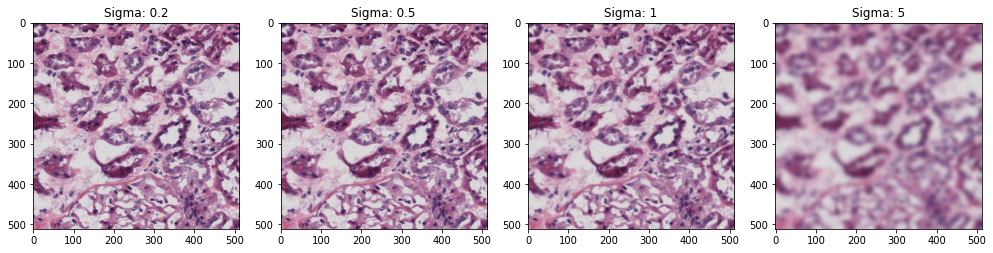

In [12]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(im)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(img_noisy)
plt.title("Noisy")
plt.show()

plt.figure(figsize=(17,5))
for n,s in enumerate([0.2,0.5,1,5]): # List of sigma values

    plt.subplot(1,4,n+1)
    im_gaussian = gaussian_filter(img_noisy, sigma = [s,s,0]) # Apply Gaussian filter, only blur within channels
    plt.imshow(im_gaussian) # Display image
    plt.title("Sigma: " + str(s))

plt.show()

Sigma=0.5 is the best: It manages to simultaneously remove some noise and keep image detail, and has the best trade-off. The others have too much noise or too much blur.